In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
X_train_path = '../data/processed/X_train.csv'
X_test_path = '../data/processed/X_test.csv'
y_train_path = '../data/processed/y_train.csv'
y_test_path = '../data/processed/y_test.csv'

X_train = pd.read_csv(X_train_path)
X_test = pd.read_csv(X_test_path)
y_train = pd.read_csv(y_train_path).squeeze()
y_test = pd.read_csv(y_test_path).squeeze()


print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nFeatures:", X_train.columns.tolist())

Training set shape: (121310, 10)
Test set shape: (30328, 10)

Features: ['PartyType_Code', 'Sobriety_Code', 'Age', 'PrimaryCollisionFactor_Code', 'CollisionType_Code', 'VehicleDamage_Code', 'MovementPrecedingCollision_Code', 'ViolationCode', 'CrashTime', 'Distance']


In [3]:
severity_mapping = {'NoInjury': 0, 'Minor': 1, 'Moderate': 2, 'Severe': 3, 'Fatal': 4}
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 0.61
Confusion Matrix:
[[14264  2415    15     0     1]
 [ 4375  4054    76     0     2]
 [ 2408  1472    87     0     0]
 [  595   281    20     0     0]
 [  192    67     4     0     0]]
Classification Report:
              precision    recall  f1-score   support

    NoInjury       0.65      0.85      0.74     16695
       Minor       0.49      0.48      0.48      8507
    Moderate       0.43      0.02      0.04      3967
      Severe       0.00      0.00      0.00       896
       Fatal       0.00      0.00      0.00       263

    accuracy                           0.61     30328
   macro avg       0.31      0.27      0.25     30328
weighted avg       0.55      0.61      0.55     30328



c:\Users\lucas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


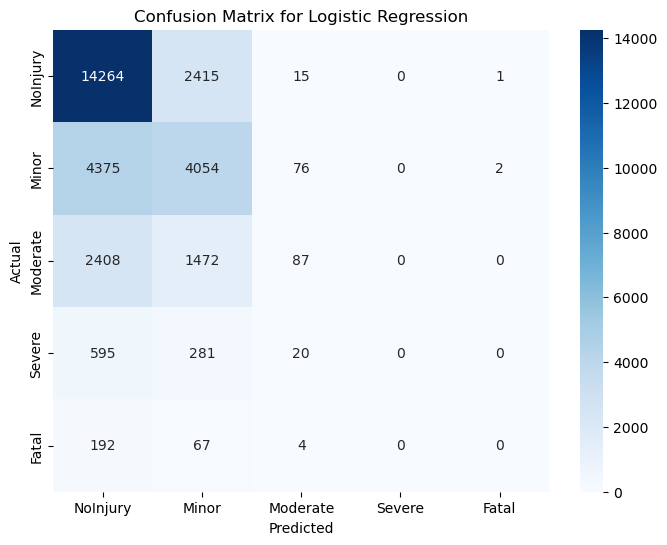

In [4]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Confusion Matrix:')
con_matrix = confusion_matrix(y_test, y_pred)
print(con_matrix)

print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=severity_mapping.keys()))

plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=severity_mapping.keys(), yticklabels=severity_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()